In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Linear advection problem
Here we try to solve a simple linear advection problem, with periodic boundary conditions and an initial condition in a form of a bump.

$$
\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0\\
u(0) = u(1)\\
u(0,x) = u_0(x)
$$

While simple, this is a difficult problem to solve numerically (!).

We will use first order, forward difference for the time derivative:
$$
\frac{\partial u}{\partial t} \approx \frac{u^{k+1}_i-u^{k}_i}{dt}
$$

and one of many available FD formulation for the $\frac{\partial u}{\partial x}$.
1. First order, forward - bad idea, unstable
2. First order, backward - for upwinding, better idea - dissipative
3. Second order, central - unstable
4. Second order, backward- 
    * $\frac{\partial u}{\partial x} = \frac{1}{2h} (3u_i-4u_{i-1}+u_{i-2})$
    
## Explicit

In [ ]:
nx = 101
nt = 1000
c = 1.0
dx = 1.0 / ( nx - 1 )
dt = 1.0 / nt
t = 0
x = np.linspace ( 0.0, 1.0, nx )
u = np.zeros ( nx )
unew = np.zeros ( nx )

def smooth():
    for i in range ( 0, nx ):
        if ( 0.4 <= x[i] and x[i] <= 0.6 ):
            u[i] = 0.5*(-np.cos(10*np.pi*x[i])+1)

def init():
    smooth()

def euler_fd_1(j):
    t=j*dt
    for i in range ( 0, nx ):
        j = i+1
        if j == nx : j=0
        unew[i] = u[i] - c*dt/dx * ( u[j] - u[i])
    for i in range ( 0, nx ):
        u[i] = unew[i]
        
def euler_bd_1(j):
    t=j*dt
    for i in range ( 0, nx ):
        unew[i] = u[i] - c*dt/dx * ( u[i] - u[i-1])
    for i in range ( 0, nx ):
        u[i] = unew[i]
        
def euler_cn_2(j):
    t=j*dt
    for i in range ( 0, nx ):
        j = i+1
        if j == nx : j=0
        unew[i] = u[i] - 0.5*c*dt/dx * ( u[j] - u[i-1])
    for i in range ( 0, nx ):
        u[i] = unew[i]
        
def euler_bd_2(j):
    t=j*dt
    for i in range ( 0, nx ):
        unew[i] = u[i] - 0.5*c*dt/dx * ( 3*u[i] - 4*u[i-1] + u[i-2])
    for i in range ( 0, nx ):
        u[i] = unew[i]

In [ ]:
u = np.zeros ( nx )
unew = np.zeros ( nx )
init()
fig = plt.figure()
plt.axes(xlim=(0, 1), ylim=(-2, 2))
plt.plot(x, u, lw=2)

In [ ]:
for i in range(0,100):
    euler_cn_2(i)
fig = plt.figure()
plt.axes(xlim=(0, 1), ylim=(-2, 2))
plt.plot(x, u, lw=2)

## Implicit
might provide some needed stability

In [161]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

nx = 101
nt = 1000
c = 1.0
dx = 1.0 / ( nx - 1 )
dt = 1.0 / nt
t = 0
x = np.linspace ( 0.0, 1.0, nx )
u = np.zeros ( nx )
unew = np.zeros ( nx )

c1 = c * dt / (2*dx)
a=np.full(nx,1)
bu=np.full(nx-1,c1)
bd=np.full(nx-1,-c1)
mat=diags([a,bu,bd], [0,1,-1])
mat=mat.toarray()

#Initial conditions
def smooth():
    for i in range ( 0, nx ):
        if ( 0.4 <= x[i] and x[i] <= 0.6 ):
            u[i] = 0.5*(-np.cos(10*np.pi*x[i])+1)
    return u

def init():
    smooth()

def euler_cn_2(j):
    t=j*dt
    mat[0,-1]=-c1
    mat[-1,0]=c1
    unew = spsolve(mat, u)
    for i in range ( 0, nx ):
        u[i] = unew[i]

In [165]:
print(mat)

[[ 1.    0.05  0.   ...  0.    0.   -0.05]
 [-0.05  1.    0.05 ...  0.    0.    0.  ]
 [ 0.   -0.05  1.   ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ...  1.    0.05  0.  ]
 [ 0.    0.    0.   ... -0.05  1.    0.05]
 [ 0.05  0.    0.   ...  0.   -0.05  1.  ]]


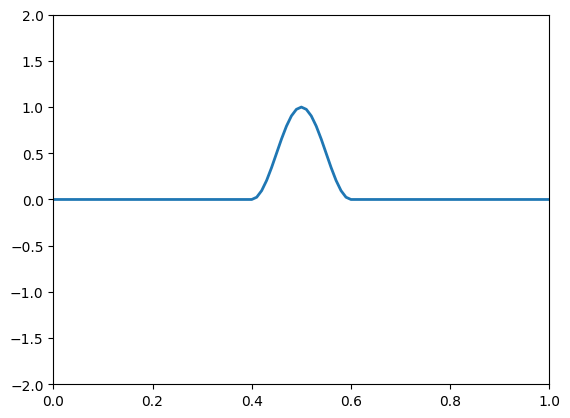

In [163]:
u = np.zeros ( nx )
unew = np.zeros ( nx )
init()
fig = plt.figure()
plt.axes(xlim=(0, 1), ylim=(-2, 2))
plt.plot(x, u, lw=2)

/home/sgepner/Virtualenv/jupyter/lib/python3.10/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:168: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


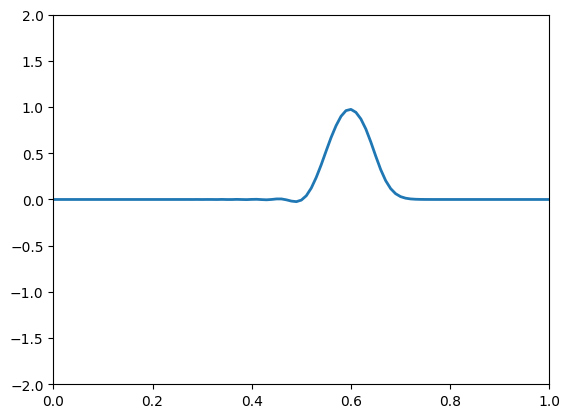

In [164]:
for i in range(0,100):
    euler_cn_2(i)
fig = plt.figure()
plt.axes(xlim=(0, 1), ylim=(-2, 2))
plt.plot(x, u, lw=2)

In [145]:
from numpy import array, zeros, diag, diagflat, dot

def Jacobi(A, b, N, y, eps = 1e-6):
    # (1) Create a vector using the diagonal elemts of A
    D = diag(A)
    # (2) Subtract D vector from A into the new vector R
    R = A - diagflat(D)
    # (3) We must Iterate for N times                                                                                                                                                                          
    for i in range(N):
        yn = (b - dot(R,y)) / D
        if np.linalg.norm(np.abs(y-yn)) < eps:
            y = yn
#             print('Converged in', i)
            return y
        y = yn
        
    raise Exception('Jacobi did not converge!')

In [146]:
def euler_cn_2(j):
    t=j*dt
    mat[0,-1]=-c1
    mat[-1,0]=c1
    unew = Jacobi(mat, u, 100, u)
    for i in range ( 0, nx ):
        u[i] = unew[i]

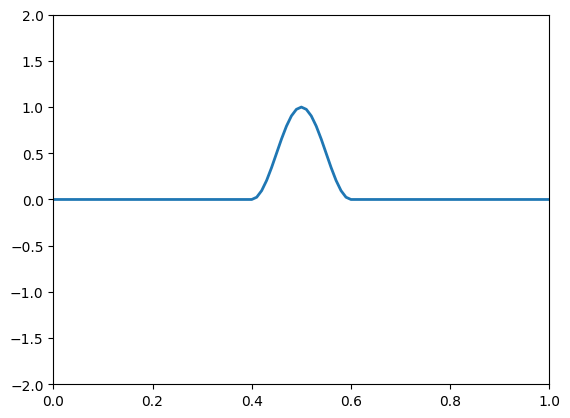

In [147]:
u = np.zeros ( nx )
unew = np.zeros ( nx )
init()
fig = plt.figure()
plt.axes(xlim=(0, 1), ylim=(-2, 2))
plt.plot(x, u, lw=2)

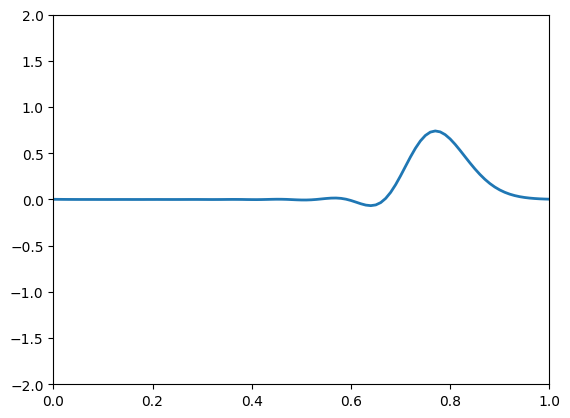

In [160]:
for i in range(0,100):
    euler_cn_2(i)
fig = plt.figure()
plt.axes(xlim=(0, 1), ylim=(-2, 2))
plt.plot(x, u, lw=2)